<a href="https://colab.research.google.com/github/gabrielborja/machine_learning/blob/main/02_linear_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Simple Linear Regression

Asumptions of Linear Regression Models>


1.   Linear relationship.
2.   Multivariate normality.
3.   No or little multicollinearity. Independent variables are not correlated with each other.
4.   No auto-correlation. The residuals are not independent from each other.
5.   Homoscedasticity meaning “same variance”. The error is the same across all values of the independent variables.




## Importing necessary libraries

In [ ]:
#Optional upgrade of matplotlib
!pip install matplotlib --upgrade

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading data

In [2]:
#Uploading dataset from local computer
from google.colab import files
uploaded1 = files.upload()

#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_csv(io.BytesIO(uploaded1['salary_data.csv']))

Saving salary_data.csv to salary_data.csv


In [3]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   years_of_experience  30 non-null     float64
 1   salary               30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#Extracting the samples matrix and target values
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values #==> Dependent variable vector

## Splitting data between training and testing

In [5]:
#Splitting between train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Simple Linear Regression (SLR) model

In [6]:
#Training the simple linear regression model
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

## Predicting values using the SLR model



In [7]:
#Predicting the test sets results
y_pred = regressor1.predict(X_test)

## Visualizing the predicted values

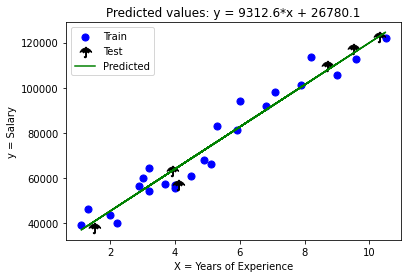

In [14]:
#Plotting the results from the predictions
plt.scatter(X_train, y_train, color='blue', s=50, label='Train')
plt.scatter(X_test, y_test, color='black', marker=r'$☂$', s=150, label='Test')
plt.plot(X_train, regressor1.predict(X_train), color = 'green', label='Predicted')
plt.title(f'Predicted values: y = {round(regressor1.coef_[0], 1)}*x + {round(regressor1.intercept_, 1)}')
plt.xlabel('X = Years of Experience')
plt.ylabel('y = Salary')
plt.legend()
plt.show()

##Checking the score of the SLR model

In [9]:
#Checking the score of the predicted values
round(regressor1.score(X_test, y_test), 3)

0.988

##Making Single Predictions

In [10]:
#Function to make a single prediction
def slr_predict(experience):
  if type(experience)!=int:
    return "Invalid input, use numeric value type"
  elif experience < 0:
    return "Experience must be greater than 0"
  else:
    return f'Predicted salary for {experience} years of experience is: $ {round(regressor1.predict([[experience]])[0], 2)}'

In [15]:
#Predicting numeric values from input
slr_predict(11)

'Predicted salary for 11 years of experience is: $129218.43'

# 02 Multiple Linear Regression Model

5 Methods for building Multiple Regression Models:

1. Backward Elimination
2. Forward selection.
3. Bidirectional Elimination.
4. Score comparison.
5. All-in. 2^N-1.

## Importing necessary libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading data

In [2]:
#Uploading dataset from local computer
from google.colab import files
uploaded2 = files.upload()

#Storing dataset in a Pandas Dataframe
import io
df2 = pd.read_csv(io.BytesIO(uploaded2['50_startups.csv']))

Saving 50_startups.csv to 50_startups.csv


In [3]:
#Checking the dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#Checking the categorical values
df2['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [5]:
#Extracting the samples matrix and target values
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values #==> Dependent variable vector

In [6]:
#Checking the array of samples matrix (features)
X[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [7]:
#Checking the array of target values
y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

## Encoding categorical data

In [8]:
#Applying One Hot Encoding to categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))

In [9]:
#Checking the array of samples matrix (features) after the transformation
X[:5]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

## Splitting data for training and testing

In [10]:
#Splitting between train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression (MLR) model

In [11]:
#Training the multiple linear regression model
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression()

## Predicting values using the MLR model



In [27]:
#Predicting the test sets results
y_pred = regressor2.predict(X_test)
df2_pred = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
df2_pred = df2_pred.assign(perc = 1-(df2_pred['y_pred']/df2_pred['y_test']))
df2_pred

,y_test,y_pred,perc
0,103282.38,103015.201598,0.002587
1,144259.40,132582.277608,0.080945
2,146121.95,132447.738452,0.093581
3,77798.83,71976.098513,0.074843
4,191050.39,178537.482211,0.065495
5,105008.31,116161.242302,-0.106210
6,81229.06,67851.692097,0.164687
7,97483.56,98791.733747,-0.013419
8,110352.25,113969.435330,-0.032779
9,166187.94,167921.065696,-0.010429


## Visualizing the predicted values

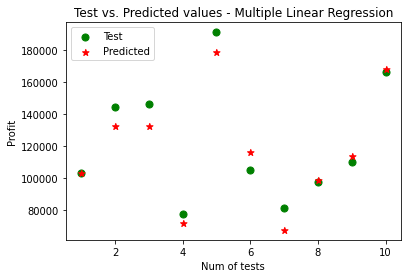

In [44]:
#Plotting the results from the predictions
plt.scatter(range(1,11), y_test, color='green', s=50, label='Test')
plt.scatter(range(1,11), y_pred, color='red', s=50, marker=r'$\bigstar$', label='Predicted')
plt.title(f'Test vs. Predicted values - Multiple Linear Regression')
plt.xlabel('Num of tests')
plt.ylabel('Profit')
plt.legend(loc='upper left')
plt.show()